# NYC TAXI TRIP DURATION PREDICTION

## Hypothesis Generation


<!--   ## Impacts on Trip time:
   ### Area
      May rural area takes time to find the right place to drop?
      In between Areas traffics 
   ### Car Condition
      Is Car condition affects the trip
   ### driver
      If low experience driver takes time to drop?
      If age of driver is medium and experienced driver ,takes minimum time for a trip?
      If age of dirver is high , he goes slowly so it takes time 
   ### customer Type
      single customer takes less time to start a trip?
      if more than one customer like family , takes time in dropping place and  starting place
   ### payment
      cash online transaction, atm and get money

   ### Timing Of Travel
      If trip time is office timing, school timing , it takes time to complete more time
   ### Trip type
       if trip is to catch a train or other important work , they dont want to stop  in between areas
       if any other normal trip , they will stop a car get some important things to get 
   ### weather
        -->
       
       1. Is starting time of travel morning 8 to 10, duration of trip is increase?
       2. Is starting time of travel evening 6 to 10,  duration of trip is high?
       3. Is weekend has a more trip time ?
       4. Is Weekday has a low trip time?
       5. Weekday evening trip has a high trip time?
       6. Weekend morning trip has a low trip time?
       7.No of Passanger count affects trip time?
       8.Is Route of travel is outer(assume no traffic) , it takes normal time to complete? 
       9.Is drop place is a city , takes more time?
       10.Is drop place has a more schools, stores, malls takes more time?
       11.Is winter season has a more trip time?
       

In [1]:
# importing libraries
import pandas as pd
from haversine import haversine, Unit
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Varriable Identification and Typecasting

In [2]:
#df.to_csv("NYC_Trip_with_distance.csv")
df1 = pd.read_csv("../data/Nyc/NYC_Trip_with_distance.csv")

In [3]:
df1.drop(df1.columns[df1.columns.str.contains('unnamed',case = False)],axis = 1, inplace = True)

In [4]:
df1["speed"] = df1["distance"]/(df1["trip_duration"]/3600)
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074,10.791668
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117,13.513473
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763,15.964983
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101,7.449573
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540,18.375877


### Integer Data Type 

In [5]:
df1.dtypes[df1.dtypes=="Int64"]

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

#### Summary:
 * **passenger_count, trip_duration**  are  number values it's okay.
 * **vendor_id** is a unique id for vendor so it converted into category 

In [6]:
df1["vendor_id"] = df1["vendor_id"].astype("category")

### Float Data type

In [7]:
df1.dtypes[df1.dtypes == "float64"]

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
distance             float64
speed                float64
dtype: object

### summary
* **pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude** are real numbers so its okay as a float  
* **distance, speed** are real numbers so its okay as a float  

## Object Data Type

In [8]:
df1.dtypes[df1.dtypes == "object"]

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

### summary
* **pickup_datetime,dropoff_datetime** is a datetime varriable
*  **store_and_fwd_flag** belongs to a categorical varriable

In [9]:
# convert data type of store_and_fwd_flag into category object
df1["store_and_fwd_flag"] = df1["store_and_fwd_flag"].astype("category")

## datetime Data Type

In [10]:
# creating an instance(date) of DatetimeIndex class using "pickup_datetime and dropoff_datetime"
date = pd.to_datetime(df1['pickup_datetime'])
date1 = pd.to_datetime(df1['dropoff_datetime'])

In [11]:
# extracting new columns from "pickup time and drop time"
# month of year when pickup was done
df1['month_pickup'] = date.dt.month_name().astype("category")
# day of week when pickup  was done
df1['dow_pickup'] = date.dt.day_name().astype("category")
df1['hour_pickup'] = date.dt.hour
# day of week when pickup  was done
df1['dow_dropoff'] = date1.dt.day_name().astype("category")
df1['hour_dropoff'] = date1.dt.hour
df1["isweekend"] =  df1["dow_pickup"].apply(lambda x: 1 if x=="Saturday" or x=="Sunday" else 0)

In [12]:
winter_season = ["December","January","February"]
spring_season = ["March","April","May"]
autumn_season = ["September","October","November"]
summer_season = ["June","July","August"]
def find_seasons(month):
    if month in winter_season:
        return "Winter"
    elif month in spring_season:
        return "Spring"
    elif month in autumn_season:
        return "Autmn"
    elif month in summer_season:
        return "Summer"

In [13]:
# Seasons in Nyc
 df1["season"] = df1["month_pickup"].apply(find_seasons)
#df1["month_pickup"].unique()

In [14]:
df1.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,distance,speed,month_pickup,dow_pickup,hour_pickup,dow_dropoff,hour_dropoff,isweekend,season
0,id1080784,2,2016-02-29 16:40:21,2016-02-29 16:47:01,1,-73.953918,40.778873,-73.963875,40.771164,N,400,1.199074,10.791668,February,Monday,16,Monday,16,0,Winter
1,id0889885,1,2016-03-11 23:35:37,2016-03-11 23:53:57,2,-73.988312,40.731743,-73.994751,40.694931,N,1100,4.129117,13.513473,March,Friday,23,Friday,23,0,Spring
2,id0857912,2,2016-02-21 17:59:33,2016-02-21 18:26:48,2,-73.997314,40.721458,-73.948029,40.774918,N,1635,7.250763,15.964983,February,Sunday,17,Sunday,18,1,Winter
3,id3744273,2,2016-01-05 09:44:31,2016-01-05 10:03:32,6,-73.961670,40.759720,-73.956779,40.780628,N,1141,2.361101,7.449573,January,Tuesday,9,Tuesday,10,0,Winter
4,id0232939,1,2016-02-17 06:42:23,2016-02-17 06:56:31,1,-74.017120,40.708469,-73.988182,40.740631,N,848,4.328540,18.375877,February,Wednesday,6,Wednesday,6,0,Winter


In [15]:
df1["season"] = df1["season"].astype("category")
df1["isweekend"] = df1["isweekend"].astype("category")
df1.dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
passenger_count          int64
pickup_longitude       float64
pickup_latitude        float64
dropoff_longitude      float64
dropoff_latitude       float64
store_and_fwd_flag    category
trip_duration            int64
distance               float64
speed                  float64
month_pickup          category
dow_pickup            category
hour_pickup              int64
dow_dropoff           category
hour_dropoff             int64
isweekend             category
season                category
dtype: object

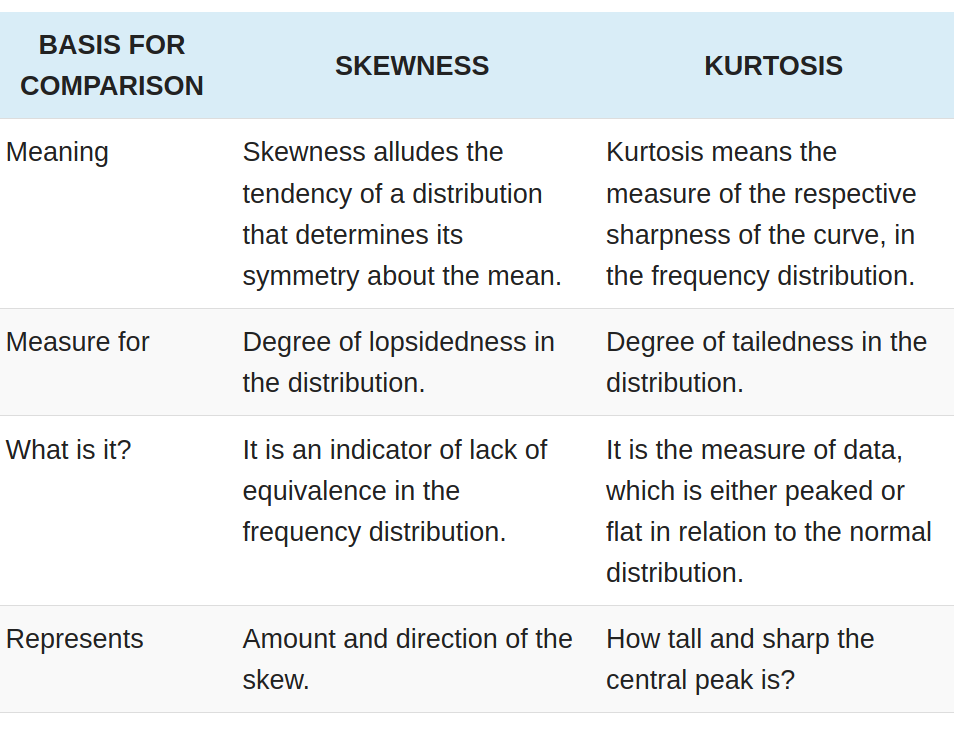

## Univariate Analysis - Numerical Varriable


In [16]:
#Numerical Varriables
df1.select_dtypes(include=['int64','float64',"Int64"]).dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
hour_pickup            int64
hour_dropoff           int64
dtype: object

In [17]:
# segregating the varriables into groups
passenger_details = ["passenger_count"]
travel_details = ["distance","speed","trip_duration"]
#travel_details = ["distance","speed"]
timewise_details = ["hour_pickup","hour_dropoff"]

In [18]:
# custom function for easy and efficient analysis of numerical univariate
#charts used for univariate analysis
#     1.scatter plot
#     2.kdeplot
#     3.lineplot
# Values Used for analysis
#     1.Minimum
#     2.Maximum
#     3.Mean
#     4.standard deviation
#     5.skewness        
#     6.kurtosis
    
def UVA_numeric(data, var_group):
  ''' 
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    print()
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### Passenger details

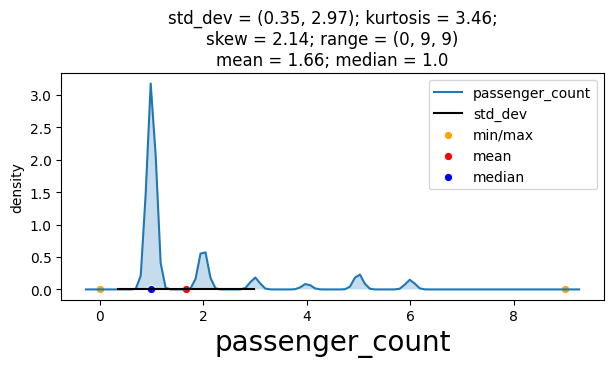

In [19]:
UVA_numeric(df1, passenger_details)

### summary of Passenger Details
* Most frequent Passengers Count is 1
* skew = 2.14(positively skewed) it is not a normal distribution
* kurtosis = 3.46 it indicates it has a strong tail 
* both skew and kurtosis indicates data has a extreme outlier values

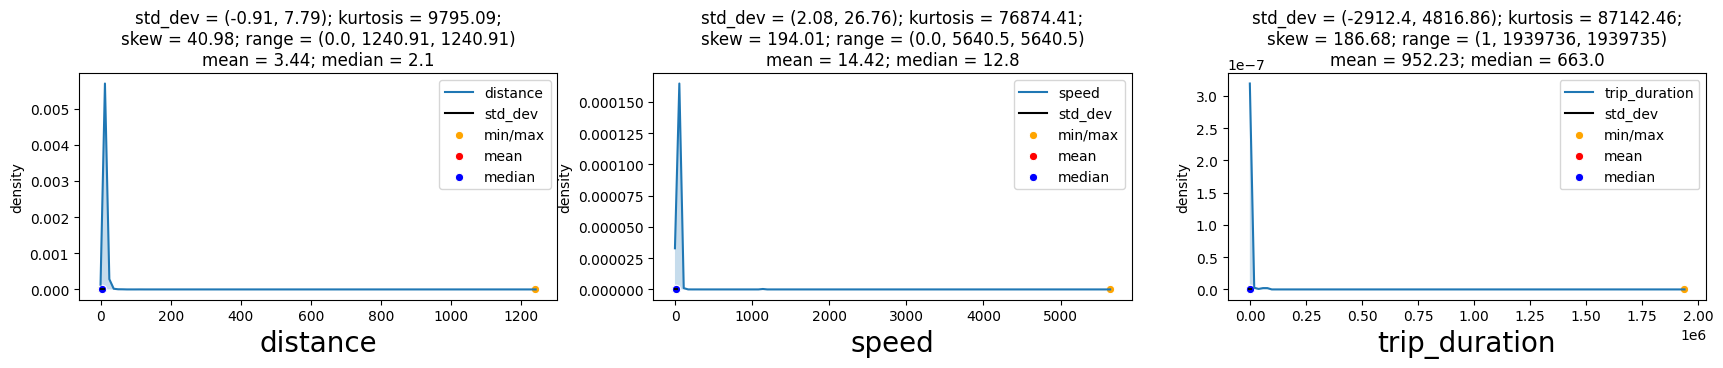

In [20]:
UVA_numeric(df1,travel_details)

### summary of travel details

* skew and kurtosis of all varriables value is high.  It has a extreme outliers  Values. We cant visualize the sort. So we need to remove the extreme outlier values

## Remove extreme outlier values to visualize  

In [21]:
# standard deviation factor for nomral distribution is 3
factor = 3
travetl_det = df1[travel_details]
# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
travetl_det = travetl_det[travetl_det['distance'] < factor*travetl_det['distance'].std()]
travetl_det = travetl_det[travetl_det['speed'] < factor*travetl_det['speed'].std()]
travetl_det = travetl_det[travetl_det['trip_duration'] < factor*travetl_det['trip_duration'].std()]
# checking how many points removed
len(df1), len(travetl_det)

(729322, 639727)

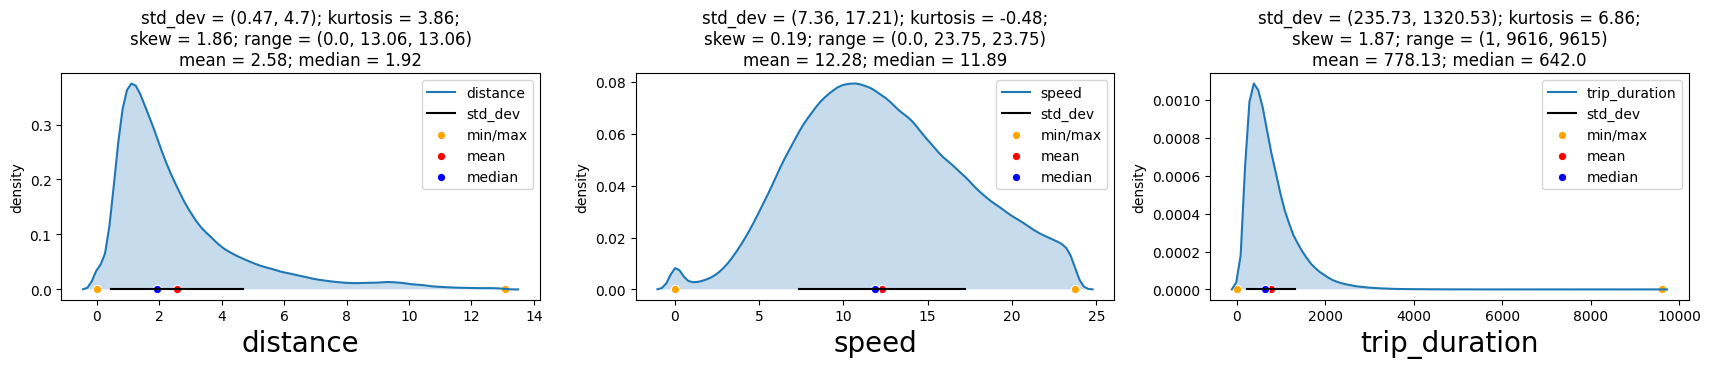

In [22]:
UVA_numeric(travetl_det,travel_details)


### Distance
* **skew is 1.86** it indicates shape of data distribution is **asymmetric** 
* **kurtosis is 3.86** indicates data has a  **outlier value**
* Average distance of trip is 2.58 km 
* maximum distance is 13 km

### Speed
* **skew is 0.19** it indicates shape of data distribution is **approximately symmetric** 
* **kurtosis is -0.48** indicates data has a  **No outlier value**
* Average Speed is 12 km and also maximum speed is 23.5

### Trip Duration
* **skew is 1.87** it indicates shape of data distribution is **asymmetric(positively skewed)** 
* **kurtosis is 6.86** indicates data has a  **extreme outlier value**
* average trip travel is 13 minutes

 
 **maximam speed is 23.5 and distance is 14 km so most trip happen within the city range**

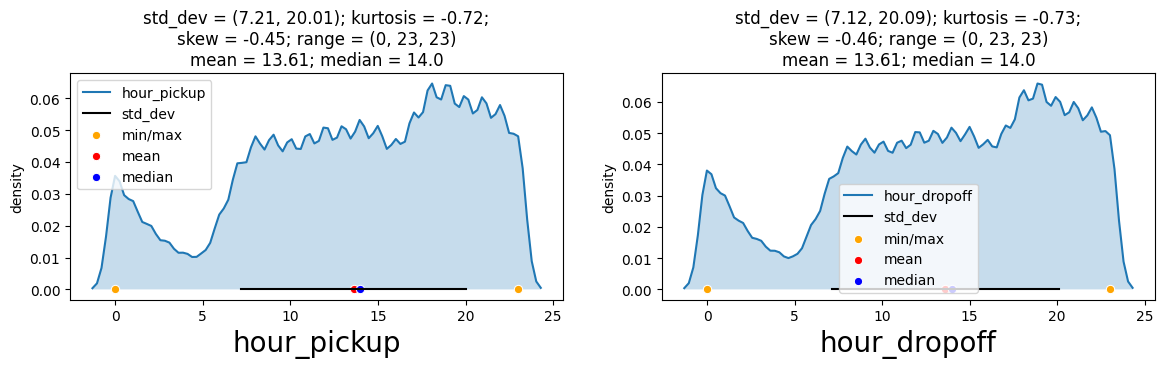

In [23]:
UVA_numeric(df1,timewise_details)

### summary

* Hour pickup and dropoff hour value is same it indicates most of the trip time is **less than one hour**
* **6 pm to 9 pm** has a more travels 

## Univariate Analysis -  Categorical varriables

## Grouping Varriables 

In [24]:
#Numerical Varriables
df1.select_dtypes(exclude=['int64','float64',"Int64"]).dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
store_and_fwd_flag    category
month_pickup          category
dow_pickup            category
dow_dropoff           category
isweekend             category
season                category
dtype: object

In [25]:
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

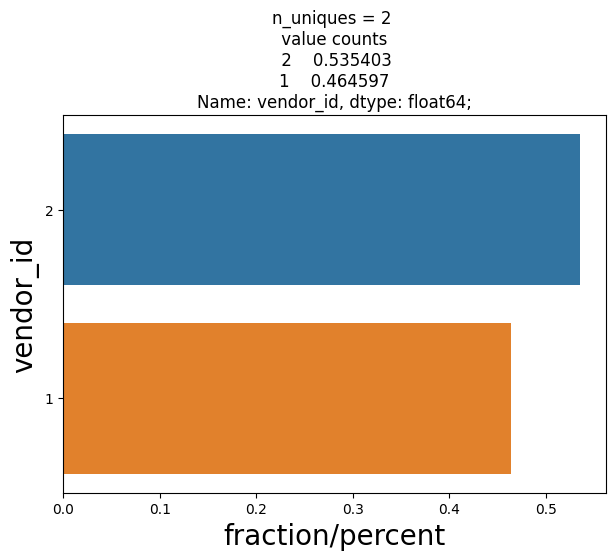

In [26]:
UVA_category(df1,["vendor_id"])

## summary

* Two unique vendors 
* Vendor id 2 has more trips than vendor id 1 

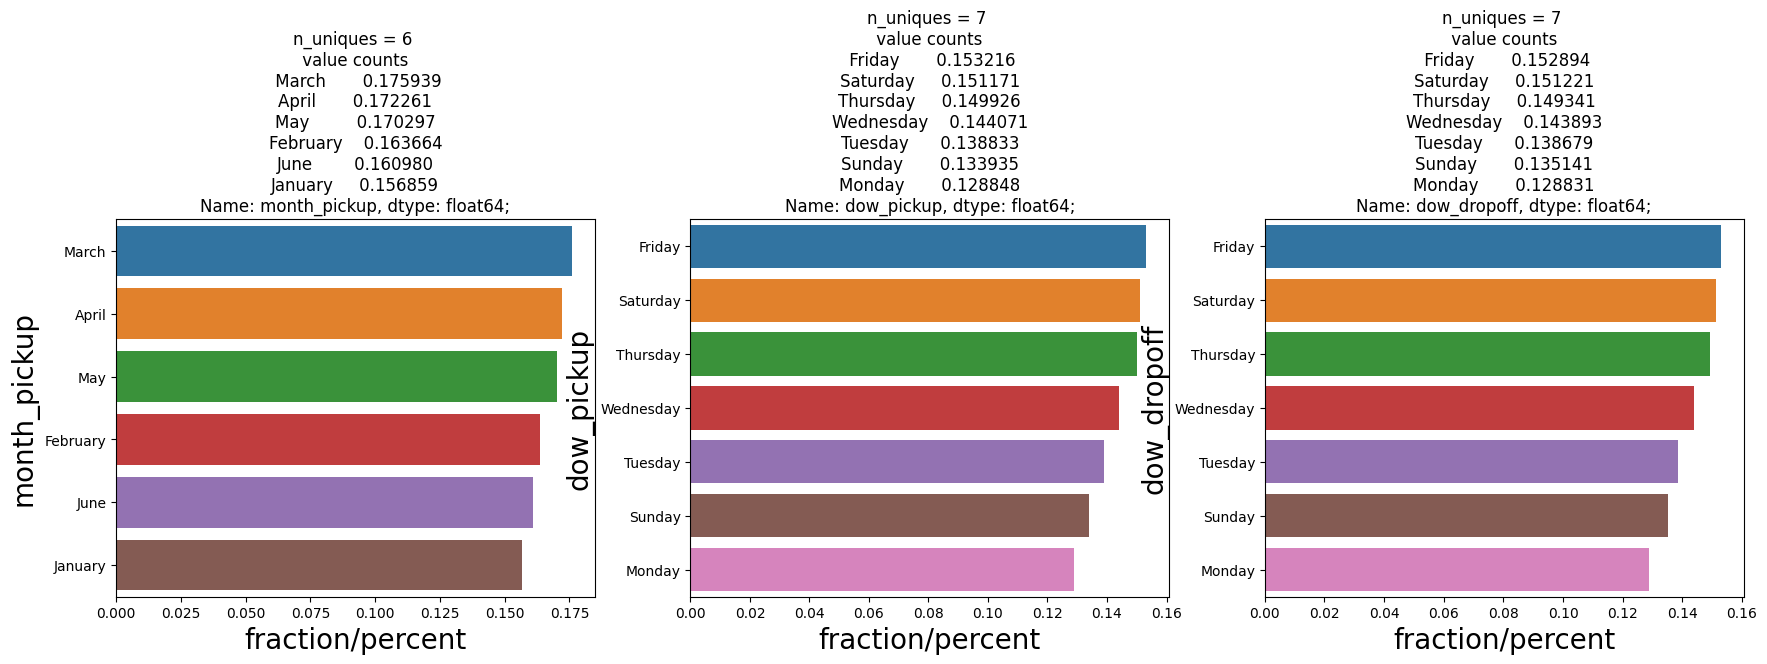

In [27]:
UVA_category(df1,["month_pickup","dow_pickup","dow_dropoff"])

### summary
*  **March** month has a **more trips**
*  **Jan**  has a **less trips**
*  **Seasons**
    * Winter - high - hard to drive - so less trips possible
    * Winter - low  -  can drive - trips possible
    * rainy - can drive - trips possible
    * summer - can drive - trips possible  
* so weather may be affect the no of trips and  trip duration   

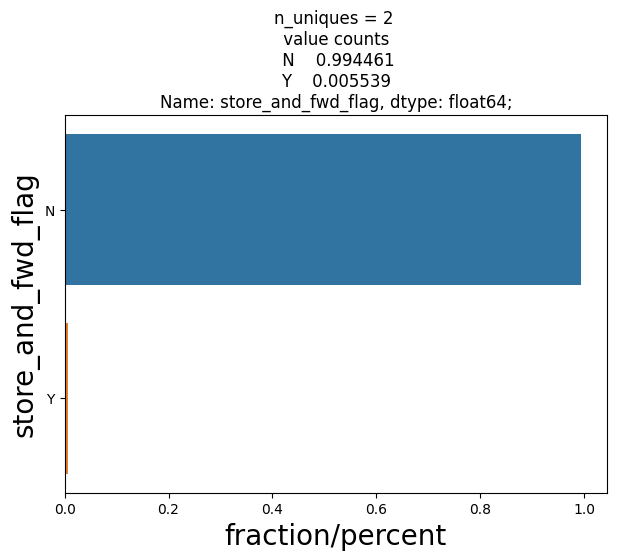

In [28]:
UVA_category(df1,["store_and_fwd_flag"])

## summary
* Most of the records directly sent. some records were stored and forwaded. So most trip happened in places which has a good signal. some place have a weak signal so it may be outer places.

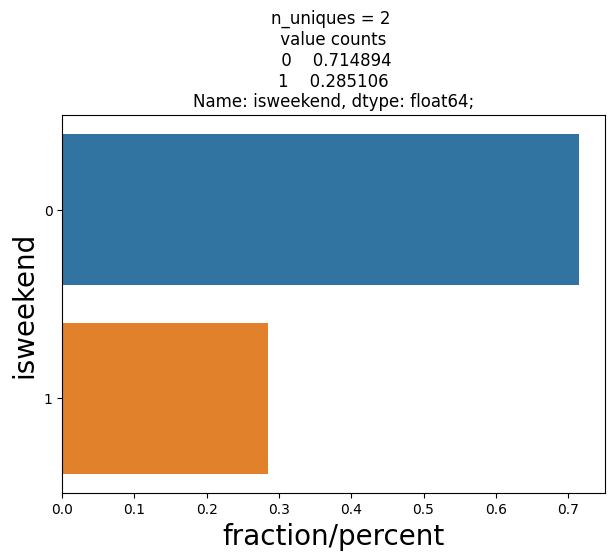

In [29]:
UVA_category(df1,["isweekend"])

### summary
* weekend has a low trips 
* weekdays has a high trips

### Univariate Analysis - Missing Values

In [30]:
df1.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
distance              0
speed                 0
month_pickup          0
dow_pickup            0
hour_pickup           0
dow_dropoff           0
hour_dropoff          0
isweekend             0
season                0
dtype: int64

### Summary 
* **No Missing Values**

## Univariate Analysis - Outliers
* **passenger_count , speed, distance, trip_duration has a outlier values.** we will inspect by box plots

In [31]:
# custom function for easy outlier analysis

def UVA_outlier(data, var_group, include_outlier = True):
  '''
  Univariate_Analysis_outlier:
  takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives\n
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it \n\n

  data : dataframe from which to plot from\n
  var_group : {list} type Group of Continuous variables\n
  include_outlier : {bool} whether to include outliers or not, default = True\n
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

True
True
True
True


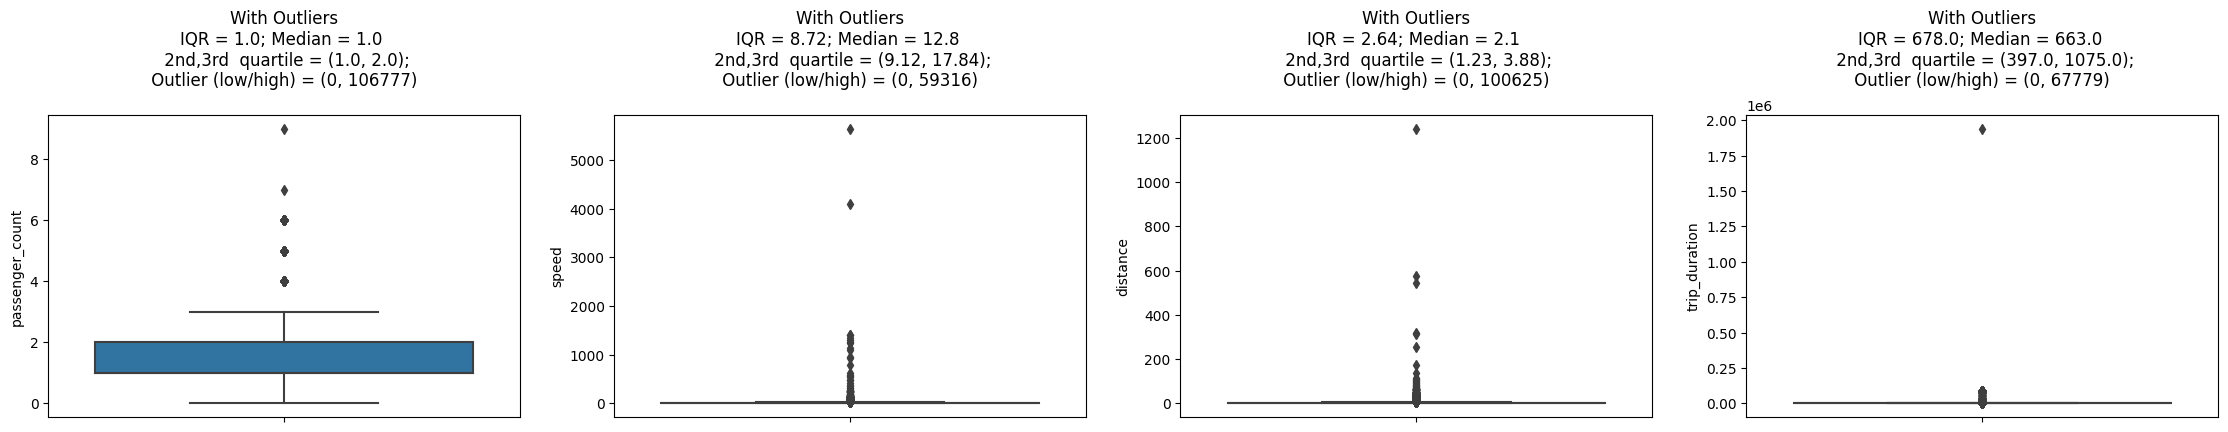

In [32]:
UVA_outlier(df1,["passenger_count","speed","distance","trip_duration"])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:49: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


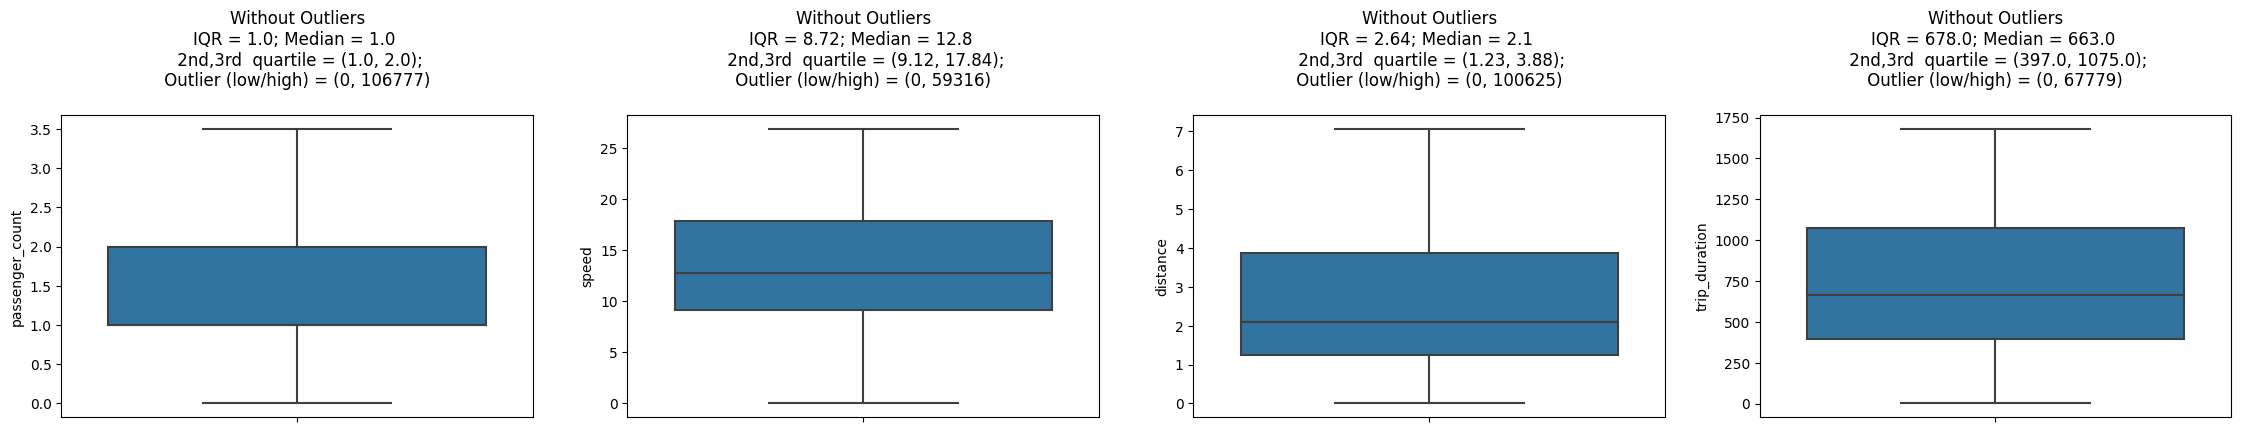

In [33]:
UVA_outlier(df1,["passenger_count","speed","distance","trip_duration"], include_outlier = False)

In [34]:
df1["passenger_count"].unique()

array([1, 2, 6, 3, 4, 5, 0, 7, 9])

## Summary
### Passenger Count
* IQR of **passenger_count** is 1
* 2nd and third quartile range is 1 to 2
* 2nd quartile and Median is same. So untill 50% of value is one 
* so most trip has a  1 to 2 passengers
### 

# Bivariate Analysis: Numerical - Numerical

In [35]:
Numerical =  df1.select_dtypes(include=["int64","float64","Int64"])[:]
Numerical.dtypes

passenger_count        int64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
trip_duration          int64
distance             float64
speed                float64
hour_pickup            int64
hour_dropoff           int64
dtype: object

## Correlation Matrix

In [36]:
correlation =  Numerical.dropna().corr()
correlation

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,distance,speed,hour_pickup,hour_dropoff
passenger_count,1.000000,0.001163,-0.004696,-0.000027,-0.003944,0.013022,0.009175,-0.002636,0.009851,0.009214
pickup_longitude,0.001163,1.000000,0.047635,0.780647,0.118473,0.035447,0.251482,0.095274,0.010754,0.011170
pickup_latitude,-0.004696,0.047635,1.000000,0.119970,0.479352,-0.038163,-0.128455,0.116824,0.011433,0.018061
dropoff_longitude,-0.000027,0.780647,0.119970,1.000000,0.149598,0.020664,0.132353,0.045954,-0.022014,-0.023193
dropoff_latitude,-0.003944,0.118473,0.479352,0.149598,1.000000,-0.028283,-0.153760,-0.054265,0.014257,0.018173
trip_duration,0.013022,0.035447,-0.038163,0.020664,-0.028283,1.000000,0.125772,-0.028189,0.002979,0.003027
distance,0.009175,0.251482,-0.128455,0.132353,-0.153760,0.125772,1.000000,0.575073,-0.016269,-0.020934
speed,-0.002636,0.095274,0.116824,0.045954,-0.054265,-0.028189,0.575073,1.000000,-0.064608,-0.072874
hour_pickup,0.009851,0.010754,0.011433,-0.022014,0.014257,0.002979,-0.016269,-0.064608,1.000000,0.934591
hour_dropoff,0.009214,0.011170,0.018061,-0.023193,0.018173,0.003027,-0.020934,-0.072874,0.934591,1.000000


## Heat Map

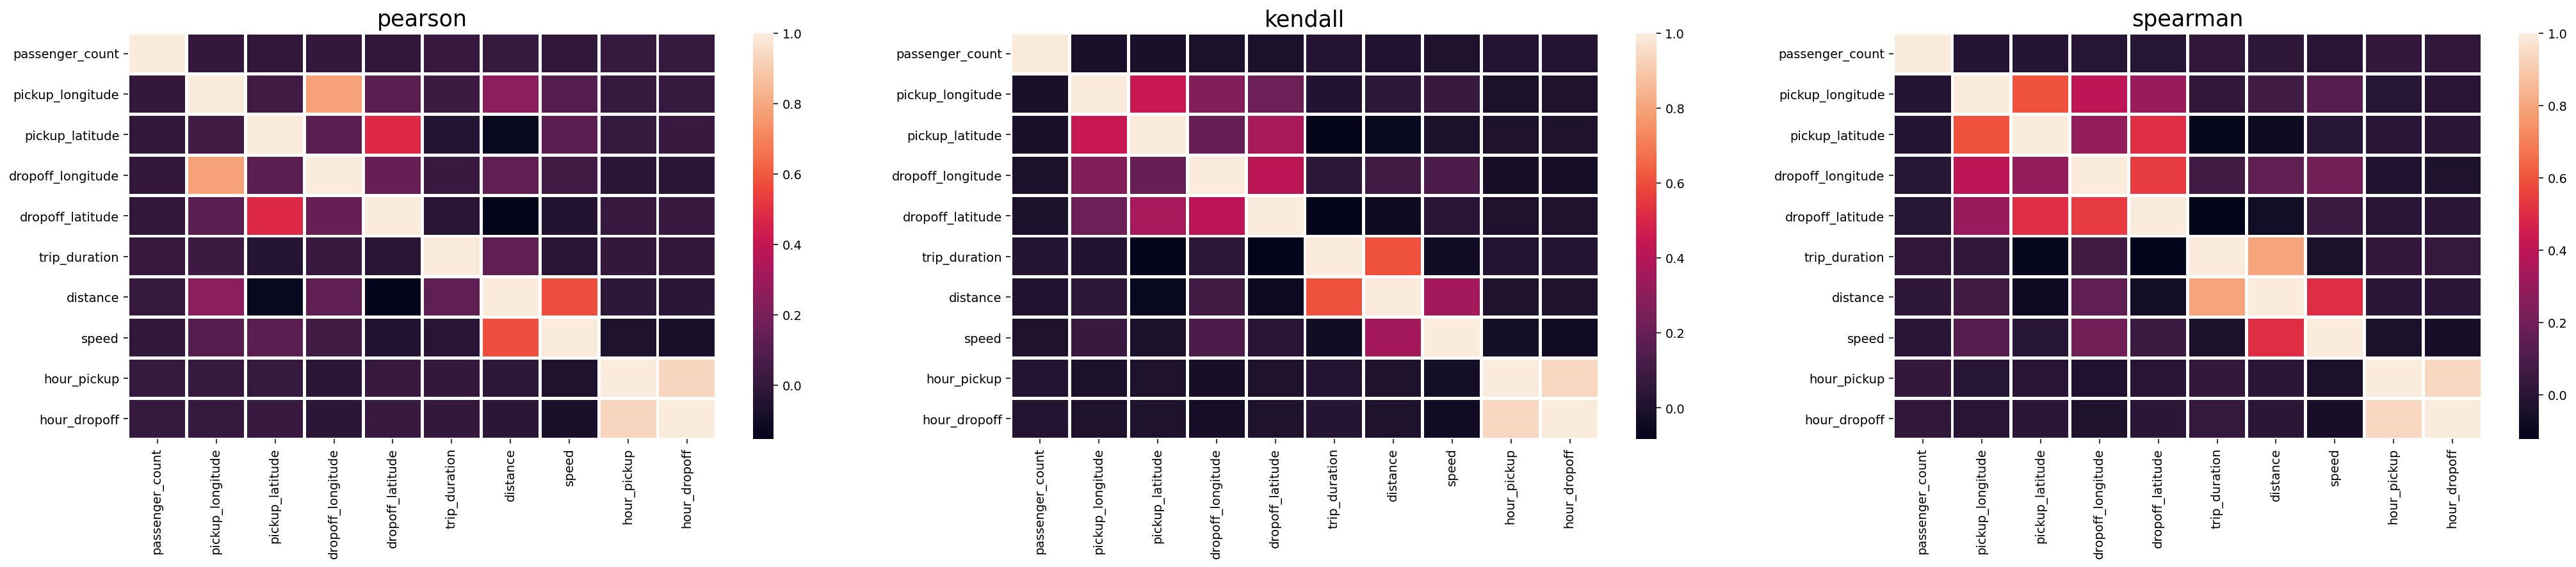

In [37]:
# plotting heatmap usill all methods for all numerical variables
plt.figure(figsize=(36,6), dpi=140)
for j,i in enumerate(['pearson','kendall','spearman']):
  plt.subplot(1,3,j+1)
  correlation = Numerical.dropna().corr(method=i)
  sns.heatmap(correlation, linewidth = 2)
  plt.title(i, fontsize=18)

## summary
* speed and distance have a correlation value 0.5. distance affects the speed. May be if distance is high driver will increase the speed.
* hour pickup time with trip duration correlation is very low. this indicates pickup time not affect the trip duration
* Most of the varriables dont have a significant Correlation


## Scatter Plot

<Figure size 840x560 with 0 Axes>

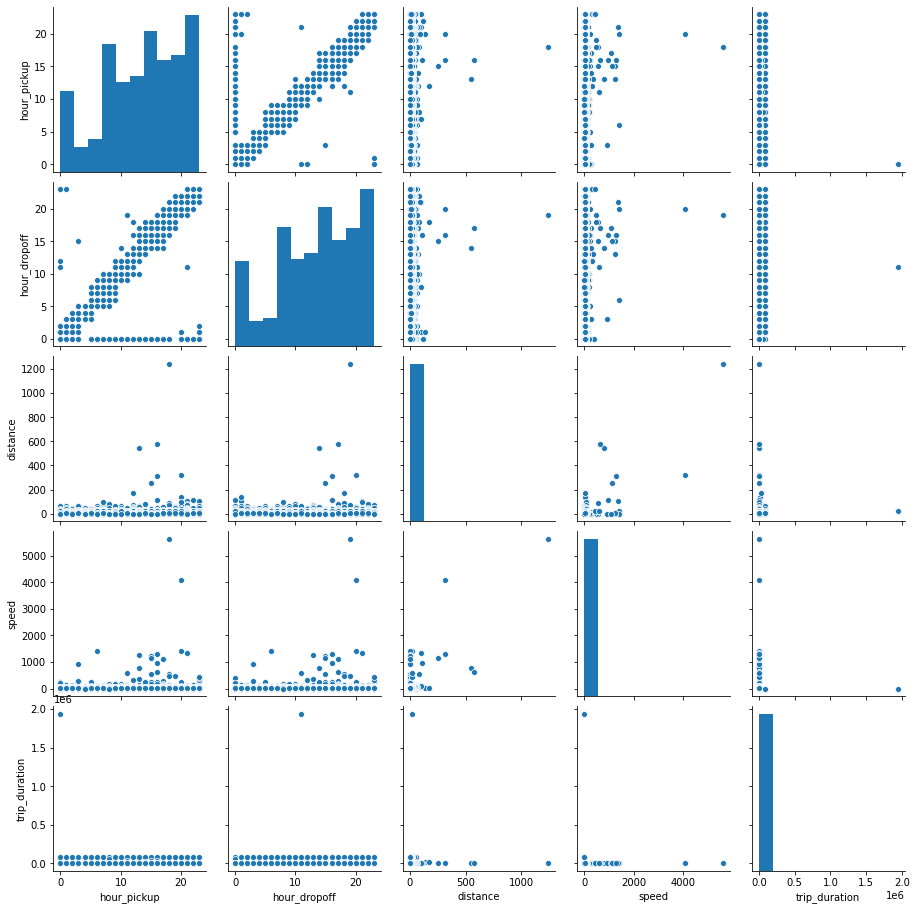

In [38]:
plt.figure(dpi=140)
sns.pairplot(Numerical[["hour_pickup","hour_dropoff","distance","speed","trip_duration"]])

In [39]:
#taking log of every value to negate outliers
var = ["distance","speed","trip_duration"]
for column in var:
  mini=1
  if Numerical[column].min()<0:
    mini =  abs(Numerical[column].min()) + 1
  
  Numerical[column] = [i+mini for i in Numerical[column]]
  Numerical[column] = Numerical[column].map(lambda x : np.log(x))

<Figure size 840x560 with 0 Axes>

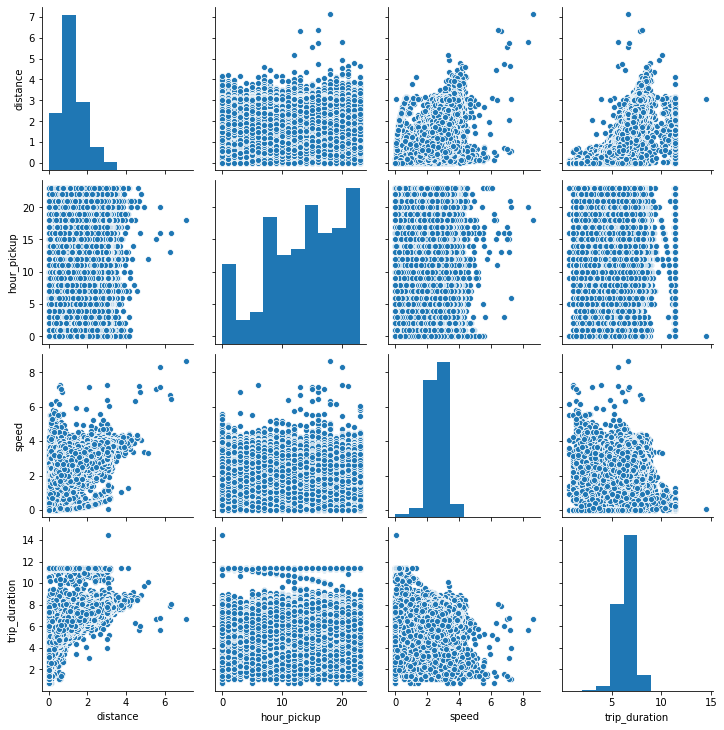

In [40]:
# scatter1 plot for transactional variables
var1 = ["distance","hour_pickup","speed","trip_duration"]
plt.figure(dpi=140)
sns.pairplot(Numerical[var1])

## Summary 
* distance 0 and nearer to zero has a high trip duration . that is not possible.But may be trip has booked after waiting for customer, customer could cancelled the trip. so it takes high trip duration.still waiting for customer and trip cancelled takes only within 10 minutes. More than 10 minutes and distance 0 data is outlier .
* speed 0 and trip duration is high. 
* hour pickup and speed . early morning,nearer 10 am, 17 pm pickup has a high speed.  
* Still Invalid Values  are exist.So We couldnt get a clear view of data.
* So We Will redraw the scatter plot after remove the invalid values.

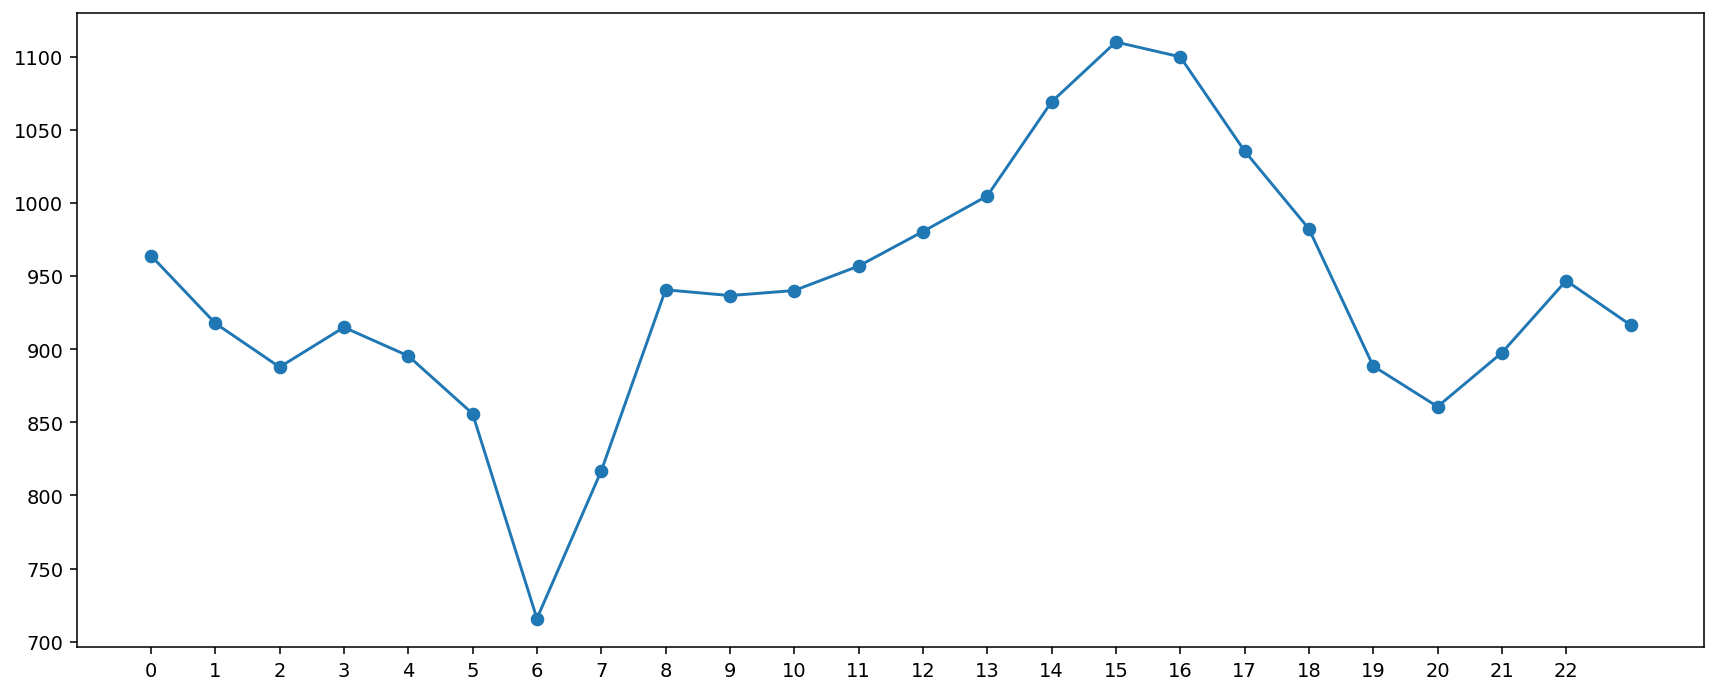

In [41]:
hpickup_vs_tripduration = df1[["hour_pickup","trip_duration"]]
avg_tripduration = hpickup_vs_tripduration.groupby('hour_pickup').mean()
avg_tripcount = hpickup_vs_tripduration.groupby('hour_pickup').count()
#df1[df1["hour_pickup"]== 0].mean()
# fig,(plt1,plt2) = plt.subplots(2)
plt.figure(figsize = (15,6), dpi=140)
plt.xticks(np.arange(0, 23, 1))
plt.plot(avg_tripduration.index,avg_tripduration["trip_duration"],marker='o')
# plt2.plot(avg_tripcount.index,avg_tripcount["trip_duration"],marker='o',color='red')

# sns.scatterplot(x="hour_pickup",y="trip_duration",data=Numerical, size=400)

# Inference:
## Questions
1. Is  early morning trip has a low trip time ?
    Hour pickup Morning 5 to 8 has a low trip time
3. Is  evening trip has a more trip time? 
    evening 16 to 18 has a more trip time
4. Hour pickup 13 to 18 has a high trip time

## Bivariate Analysis - Continuous - Categorical variables

List of Hypothesis and investigation to perform under this combination.
1. Is  Weekend trip has a more trip time ?
2. Is  summer season has a more trip time? 

In [42]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [43]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  print(ovr_sd)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [44]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'not {}'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

## 1.Is  Weekend  trip has a high trip time ?

7.592602761610461


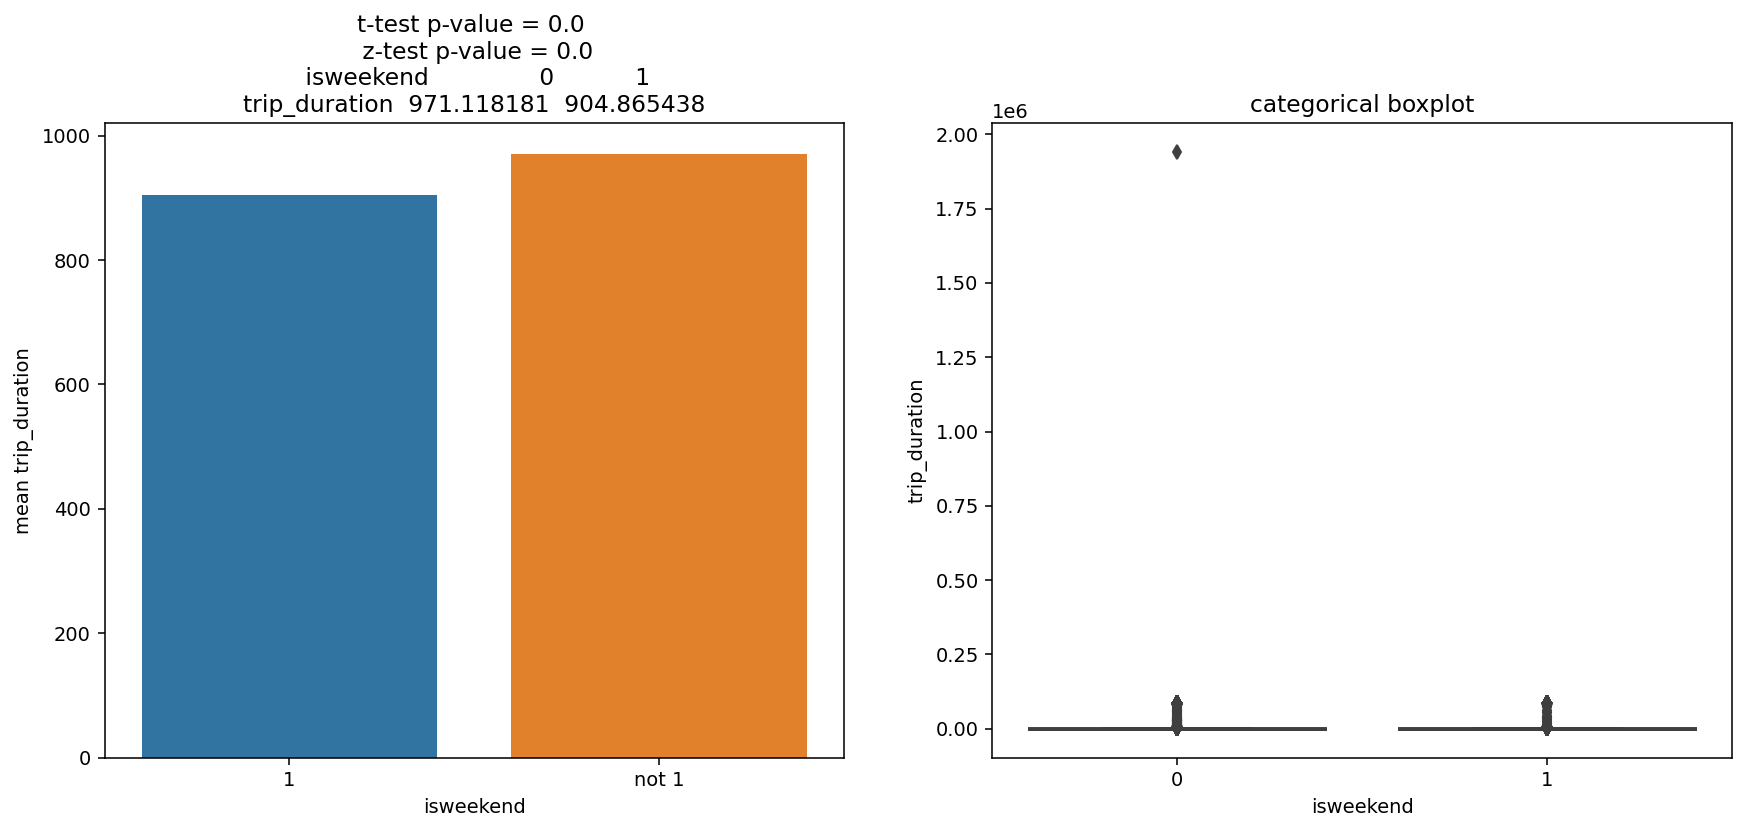

In [45]:
Bivariate_cont_cat(df1,'trip_duration','isweekend',1)

### Inference
* weekend trip has a low trip time 

### Is summer has a more trip time ?

9.119314706468156


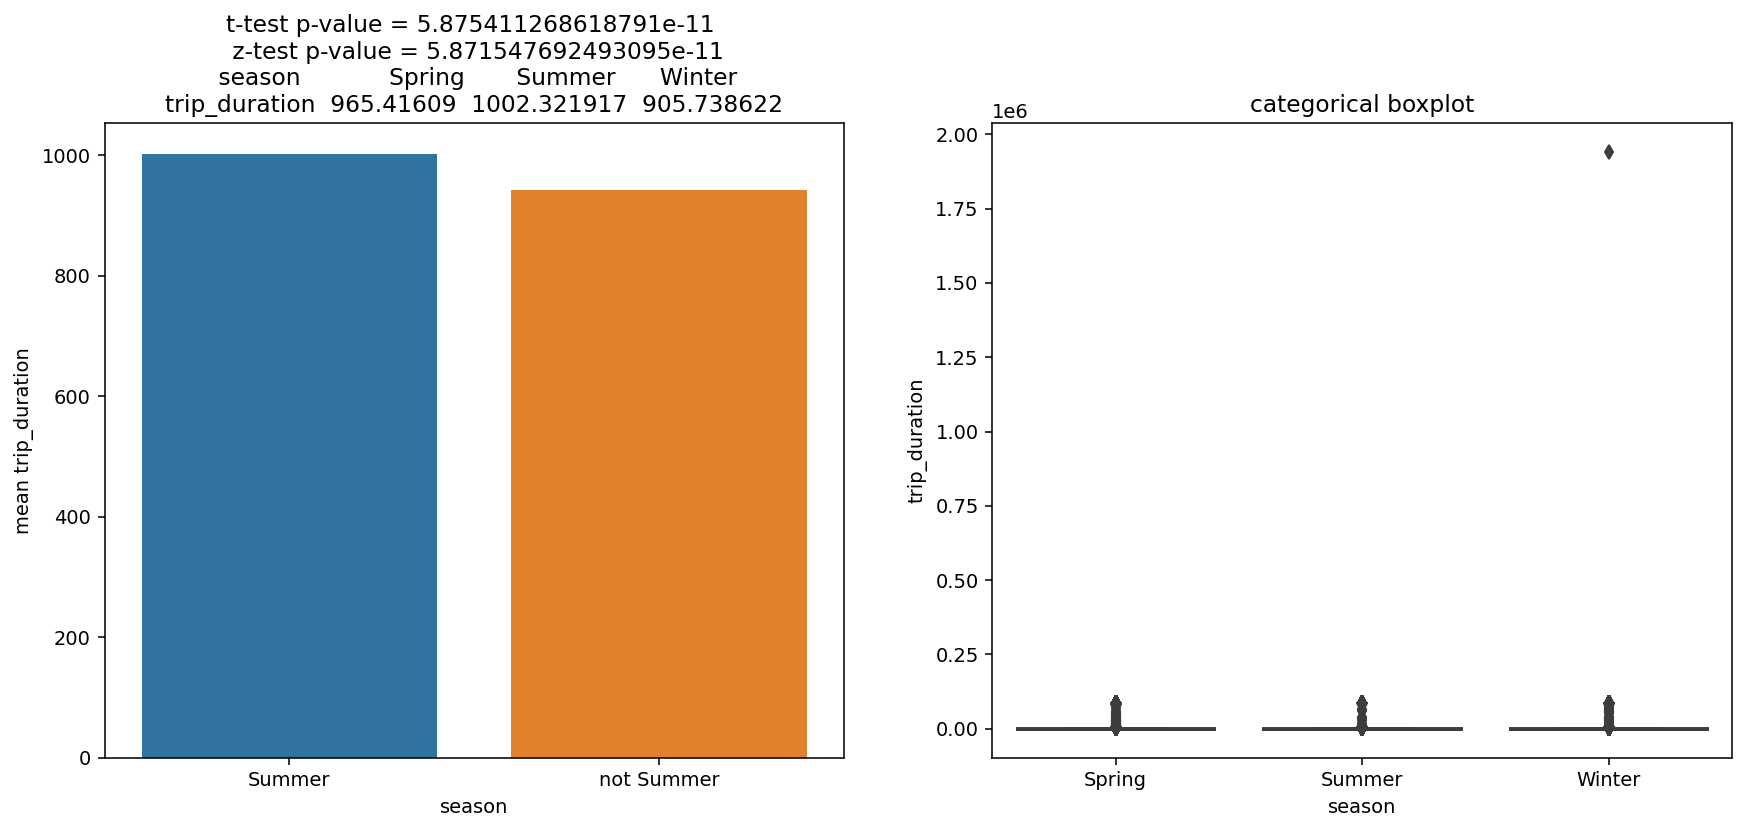

In [46]:
Bivariate_cont_cat(df1,'trip_duration','season','Summer')

## Inferences
* summer has a more trip time

## Bivariate: Category-category 

### List of Hypothesis check under this combination


In [47]:
def BVA_categorical_plot(data, tar, cat):
  '''
  take data and two categorical variables,
  calculates the chi2 significance between the two variables 
  and prints the result with countplot & CrossTab
  '''
  #isolating the variables
  data = data[[cat,tar]][:]

  #forming a crosstab
  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  #performing chi2 test
  from scipy.stats import chi2_contingency
  chi, p, dof, expected = chi2_contingency(f_obs)
  
  #checking whether results are significant
  if p<0.05:
    sig = True
  else:
    sig = False

  #plotting grouped plot
  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n".format(round(p,8),sig))

  #plotting percent stacked bar plot
  #sns.catplot(ax, kind='stacked')
  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()

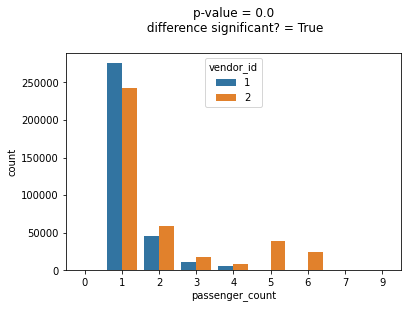

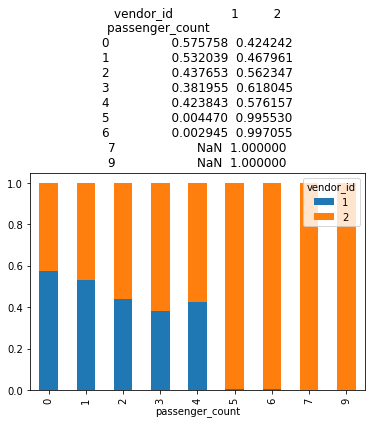

In [48]:
BVA_categorical_plot(df1,"vendor_id","passenger_count")

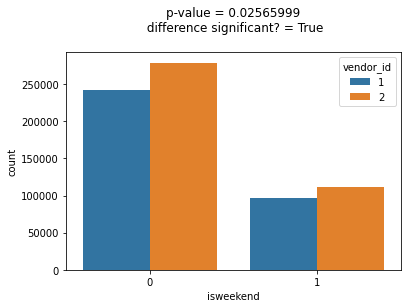

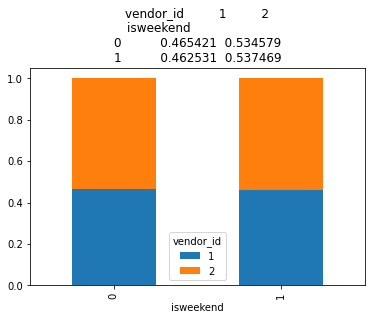

In [49]:
BVA_categorical_plot(df1,"vendor_id","isweekend")

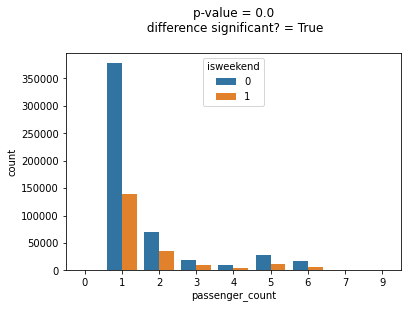

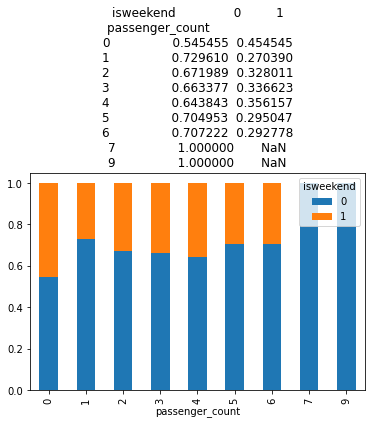

In [50]:
BVA_categorical_plot(df1,"isweekend","passenger_count")

In [51]:
#categorical Varriables
df1.select_dtypes(exclude=['int64','float64',"Int64"]).dtypes

id                      object
vendor_id             category
pickup_datetime         object
dropoff_datetime        object
store_and_fwd_flag    category
month_pickup          category
dow_pickup            category
dow_dropoff           category
isweekend             category
season                category
dtype: object

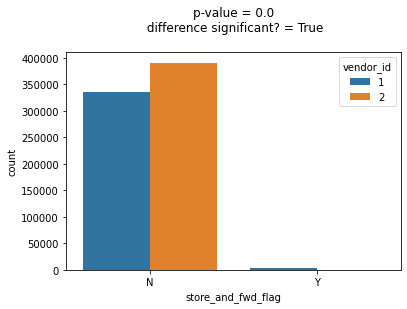

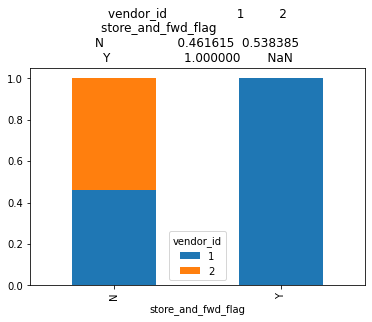

In [52]:
BVA_categorical_plot(df1,"vendor_id","store_and_fwd_flag")

## Multivariate Analysis

 ### List of Hypothesis
    1.Weekday evening trip has a high trip time?
    2.Weekend morning trip has a low trip time?

In [53]:
cols = ['hour_pickup','trip_duration']
data1 = pd.DataFrame()
data1["trip_duration"] = np.log(df1["trip_duration"])
data1["hour_pickup"] = df1["hour_pickup"]
data1["isweekend"] = df1["isweekend"]
# data1.head()
sns.scatterplot(x="hour_pickup",y="trip_duration",hue="isweekend", data=df1)

<AxesSubplot:xlabel='hour_pickup', ylabel='trip_duration'>

ValueError: zero-size array to reduction operation minimum which has no identity

<Figure size 432x288 with 1 Axes>

In [54]:
def Grouped_Box_Plot(data, cont, cat1, cat2):
    # boxplot
    sns.boxplot(x=cat1, y=cont, hue=cat2, data=data, orient='v', showfliers = False)
    plt.title('Boxplot')


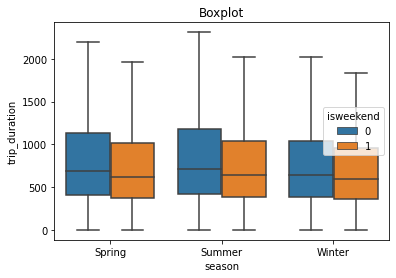

In [55]:
Grouped_Box_Plot(df1,'trip_duration', 'season', 'isweekend')

### Inferences
* In all seasons weekdays have a  high trip time
* summer season has a high trip time